<a href="https://colab.research.google.com/github/monicalidya/3333210047_MonicaLidyaPutri_C/blob/main/Monica_Lidya_Putri_3333210047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Real Estate Sales 2001-2020 GL**

---



---



**About Dataset**

The Office of Policy and Management maintains a listing of all real estate sales with a sales price of $2,000 or greater that occur between October 1 and September 30 of each year. For each sale record, the file includes; town, property address, date of sale, property type (residential, apartment, commercial, industrial or vacant land), sales price, and property assessment.



---
[Link dari dataset](https://www.kaggle.com/datasets/utkarshx27/real-estate-sales-2001-2020-gl)



## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**1.1 Importing Library**

**Melakukan import beberapa library yang akan digunakan untuk menyelesaikan permasalahan dibawah**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Library pandas merupaka library yang digunakan untuk mengolah data yang berasal dari format file CVS

**1.2 Importing Dataset**

**Melakukan import Data yang sebelumnya sudah ditambahkan di gdrive**

In [23]:
!gdown 1NClcZ9GNNGrGTSDg55du45gXcijZuU7K

Downloading...
From: https://drive.google.com/uc?id=1NClcZ9GNNGrGTSDg55du45gXcijZuU7K
To: /content/Real_Estate_Sales_2001-2020_GL.csv
100% 110M/110M [00:01<00:00, 108MB/s]


Import bertujuang untuk melakukan uploud dari data yang sudah kita pilih untuk dilakukan running dengan bantuan coding-coding dibawah nantinya

**Melakukan import pabdas menjadi pd, dan pd didefinisikan sebagai sebuah dataset**

In [24]:
import pandas as pd
dataset = pd.read_csv('/content/Real_Estate_Sales_2001-2020_GL.csv')
dataset

<ipython-input-24-ba8237137315>:2: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/Real_Estate_Sales_2001-2020_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN


Data diatas didapatkan dari hasil import dari link file yang sudah kita masukkan

In [25]:
dataset = pd.DataFrame(dataset)
dataset.replace(r'unknown', np.nan, inplace = True)
dataset.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


## 2. Exploratory Data

**Setelah itu melakukan penyelidikian dari data yang ada**

**Mencari berapa ukuran dari dataset**
terdapat 997213 baris dengan 14 kolom

In [26]:
dataset.shape

(997213, 14)

Fungsi dari dataset.shape adalah untuk Melihat ada berapa banyak jumlah data yang menggunakan fungsi dari size

**coding ini digunakan untuk mencari ada kolom apa saja pada dataset ini, lalu didapatkan hasil seperti dibawah**

In [27]:
dataset.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

**Coding dibawah ini digunakan untuk mengetahui data yang ada pada dataset masuk kedalam type apa**

In [28]:
dataset.dtypes

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Assessor Remarks     object
OPM remarks          object
Location             object
dtype: object

**Coding dibawah ini memberikan informasi terkait banyaknya jumlah data yang ada di setiap kolom beserta jenis dari type datanya, serta jumlah memori yang digunakan untuk data dibawah ini**

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149830 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


Coding diatas menunjukkan bahwa dataset diatas bertype float sebanyak 3 kolom data, integer sebanyak 2 kolom data, dan object sebanyak 9 kolom data

**Coding dibawah ini digunakan untuk menghitung jumlah nilai unik dalam dataset dibawah ini**

In [30]:
dataset.nunique()

Serial Number        83537
List Year               20
Date Recorded         6387
Town                   170
Address             714371
Assessed Value       91378
Sale Amount          57372
Sales Ratio         547044
Property Type           11
Residential Type         5
Non Use Code           106
Assessor Remarks     66507
OPM remarks           4825
Location            130529
dtype: int64

Coding diatas berguna untuk mengembalikan jumlah dari nilai unik, sehingga perlu memperhatikan nilai dari NaN yang tidak akan dilakukan perhitungan 

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

**coding dibawah berfungsi untuk menghitung jumlah nilai yang hilang dalam setiap kolom dataset yang digunakan**

In [31]:
dataset.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847383
OPM remarks         987279
Location            799516
dtype: int64

Fungsi dari coding diatas adalah untuk merapihkan suatu kolom yang datanya ada atau tidak. Jika data nya tidak ada pada kolom maka diberikan data pengganti. Seperti contoh diatas ada data terkait opm mark yang jumlahnya ada 987279. Hal tersebut berarti bahwa terdapat data pada kolom tersebut, dan jika tidak ada maka akan berpotensi terjadinya perbedaan hitungan. 

**Coding dibawah ini berarti bahwa data yang ada pada kolom assessed value merupakan data yang float64**

In [32]:
dataset['Assessed Value'].dtypes

dtype('float64')

****Coding dibawah ini berarti bahwa data yang ada pada kolom Sale Amount merupakan data yang float64****

In [33]:
dataset['Sale Amount'].dtypes

dtype('float64')

****Coding dibawah ini berarti bahwa data yang ada pada kolom Sales Ratio merupakan data yang float64****

In [34]:
dataset['Sales Ratio'].dtypes

dtype('float64')

Perform imputer to handle missing value in numerical data

**coding dibawah ini untuk menginstall library yang digunakan untuk mengisi nilai-nilai yang hilang**

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

Kodingan ini melatih objek imputer yang telah dibuat sebelumnya pada kolom dalam dataset. dalam kasus ini objek imputer akan menghitung nilai dari rata-rata setiap kolom yang akan digunakan sebagai sebuah referensi untuk mengisi nilai disetiap kolom. Dengan menggunkan kodingan tersebut objek imputer akan dilatih dengan data yang ada pada kolom yang telahg di tentukan

**Coding dibawah menunjukkan data pada kolom mana saja yang harus ditambahkan nilai karena sebelumnya tidak ada nilainya**

In [38]:
imputer = imputer.fit(dataset[['Assessed Value','Sale Amount','Sales Ratio']])
imputer

SimpleImputer()

Koding diatas berarti terjadinya import dari library sklearn.impute yang didalamnya di import dari kelas simpleimputer. koding itu digunakan untuk mengisi nilai yang hilang dalam dataset. Kodingan diatas berfungsi untuk melakukan transformasi pada dataset menggunakan imputer yang telah dilatih sebelumnya. baris dari setiap kodingan juga mencetak jumlah dari nilai yang hilang. Saat transformasi telah selesai maka nilai-nilai dari kolom yang kosong akan diisi dengan nilai rata-rata

**coding dibawah digunakan untuk melihat jumlah dari nilai-nilai dataset yang masih hilang**

In [39]:
dataset[['Assessed Value','Sale Amount','Sales Ratio']] = imputer.transform(dataset[['Assessed Value','Sale Amount','Sales Ratio']])
dataset.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847383
OPM remarks         987279
Location            799516
dtype: int64

Kodingan ini mengimport kelas SimpleImputer dari library sklearn.impute yang digunakan untuk mengisi nilai yang hilang (missing values) dalam dataset dengan strategi tertentu.

Berdasarkan hasil data diatas didapatkan bahwa sudah tidak ada nilai-nilai yang hilang dari setiap kolom

Using drop column tohandle missing value on categorical or object data

**Coding dibawah digunakan untuk menghapus kolom dataset yang masih memiliki nilai-nilai yang hilang**

In [40]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Serial Number     0
List Year         0
Town              0
Assessed Value    0
Sale Amount       0
Sales Ratio       0
dtype: int64

berdasarkan data diatas berarti sudah tidak ada kolom yang tidak memiliki nilai atau nilai nya yang hilang

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

In [41]:
dataset = pd.DataFrame(dataset)
dataset.replace(r'unknown', np.nan, inplace = True)
dataset.head()

,Serial Number,List Year,Town,Assessed Value,Sale Amount,Sales Ratio
0,2020348,2020,Ansonia,150500.0,325000.0,0.4630
1,20002,2020,Ashford,253000.0,430000.0,0.5883
2,200212,2020,Avon,130400.0,179900.0,0.7248
3,200243,2020,Avon,619290.0,890000.0,0.6958
4,200377,2020,Avon,862330.0,1447500.0,0.5957


coding diatas digunakan untuk menggambarkan dataset dalam sebuah frame

In [42]:
dataset = dataset.dropna(axis=1)
dataset.head()

,Serial Number,List Year,Town,Assessed Value,Sale Amount,Sales Ratio
0,2020348,2020,Ansonia,150500.0,325000.0,0.4630
1,20002,2020,Ashford,253000.0,430000.0,0.5883
2,200212,2020,Avon,130400.0,179900.0,0.7248
3,200243,2020,Avon,619290.0,890000.0,0.6958
4,200377,2020,Avon,862330.0,1447500.0,0.5957


In [43]:
dataset = dataset.drop('Assessed Value', axis=1)
dataset.head()

,Serial Number,List Year,Town,Sale Amount,Sales Ratio
0,2020348,2020,Ansonia,325000.0,0.4630
1,20002,2020,Ashford,430000.0,0.5883
2,200212,2020,Avon,179900.0,0.7248
3,200243,2020,Avon,890000.0,0.6958
4,200377,2020,Avon,1447500.0,0.5957


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

**Coding dibawah ini digunakan untuk menghasilkan ringkasan statistik dari dataset**

In [46]:
dataset.describe()

,Serial Number,List Year,Sale Amount,Sales Ratio
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05
mean,4.311864e+05,2010.189829,3.911512e+05,1.044637e+01
std,6.549219e+06,6.237877,5.347270e+06,1.890192e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,1.400000e+05,4.867000e-01
50%,7.030300e+04,2010.000000,2.250000e+05,6.246000e-01
75%,1.518780e+05,2016.000000,3.650000e+05,7.852761e-01
max,2.000500e+09,2020.000000,5.000000e+09,1.226420e+06


Coding diatas menggambarkan hasil dari nilai standar deviasi, rata-rata, nilai median, nilai paling minimum, nilai paling minimal, serta menggambarkan Q1 dan Q2. Jenis dari plot yang diatas tergantung pada jenis data yang ada pada dataframe.  efektivitas plot ini tergantung pada jenis dan struktur data dalam dataset. Kita perlu mengatur opsi tambahan, seperti jenis plot atau kolom yang ingin divisualisasikan, untuk mendapatkan tampilan yang paling relevan dan informatif.

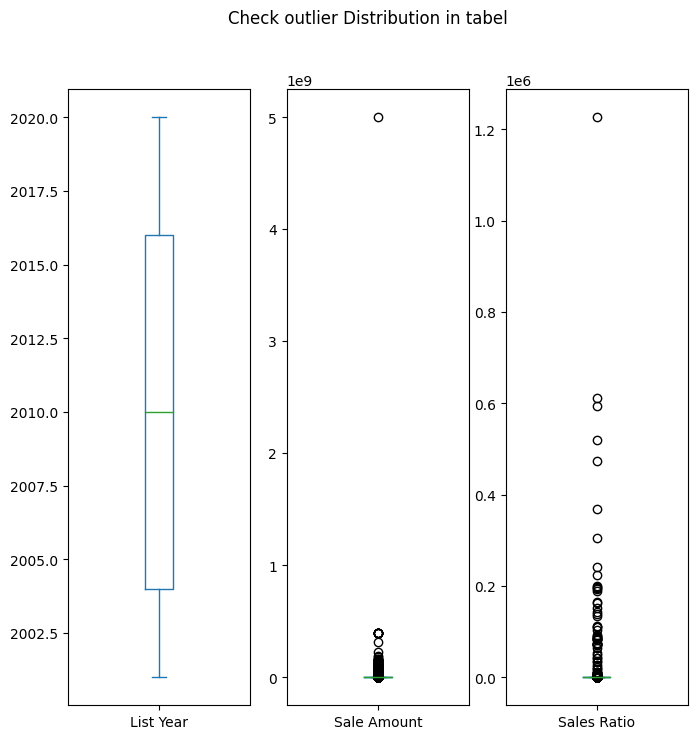

In [49]:
outlier = dataset[['List Year','Sale Amount','Sales Ratio']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,3),
                                                      sharex = False, sharey = False,
                                                      title='Check outlier Distribution in tabel')

In [51]:
# List Year
duration = np.where(dataset['List Year'] >= (4000))
# Sales Ratio
campaign = np.where(dataset['Sales Ratio'] >= (45))

dataset.drop(duration[0], inplace = True)
dataset.drop(campaign[0], inplace = True)
 
dataset.describe()

,Serial Number,List Year,Sale Amount,Sales Ratio
count,9.932660e+05,993266.000000,9.932660e+05,993266.000000
mean,4.319683e+05,2010.190401,3.924034e+05,0.841937
std,6.558931e+06,6.239964,5.357838e+06,1.701376
min,0.000000e+00,2001.000000,0.000000e+00,0.000000
25%,3.044100e+04,2004.000000,1.400000e+05,0.486100
50%,7.029500e+04,2010.000000,2.250000e+05,0.623549
75%,1.592230e+05,2016.000000,3.650000e+05,0.782324
max,2.000500e+09,2020.000000,5.000000e+09,44.975000


In [52]:
dataset2 = pd.get_dummies(dataset)
dataset2.head()

,Serial Number,List Year,Sale Amount,Sales Ratio,Town_***Unknown***,Town_Andover,Town_Ansonia,Town_Ashford,Town_Avon,Town_Barkhamsted,...,Town_Willington,Town_Wilton,Town_Winchester,Town_Windham,Town_Windsor,Town_Windsor Locks,Town_Wolcott,Town_Woodbridge,Town_Woodbury,Town_Woodstock
0,2020348,2020,325000.0,0.4630,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20002,2020,430000.0,0.5883,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,200212,2020,179900.0,0.7248,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,200243,2020,890000.0,0.6958,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,200377,2020,1447500.0,0.5957,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Coding dibawah digunakan untuk menghitung library baru yang digunakan untuk menggambarkan data dalam sebuah plot ataupun grafik**

<Axes: >

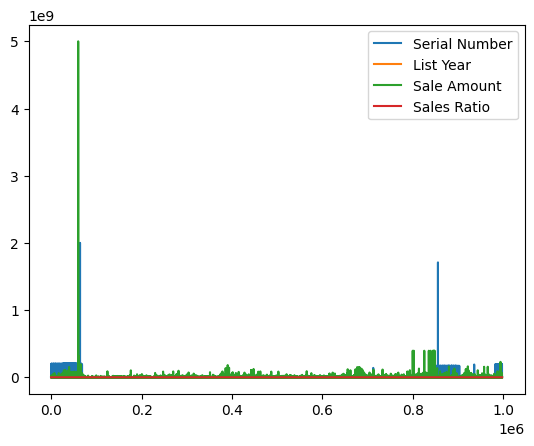

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

In [ ]:
Berdasarkan coding diatas didapatkan bahwa nilai dari sale amount memiliki ukuran yang berbeda-beda

**Coding dibawah ini digunakan untuk Mengubah bentuk plot **

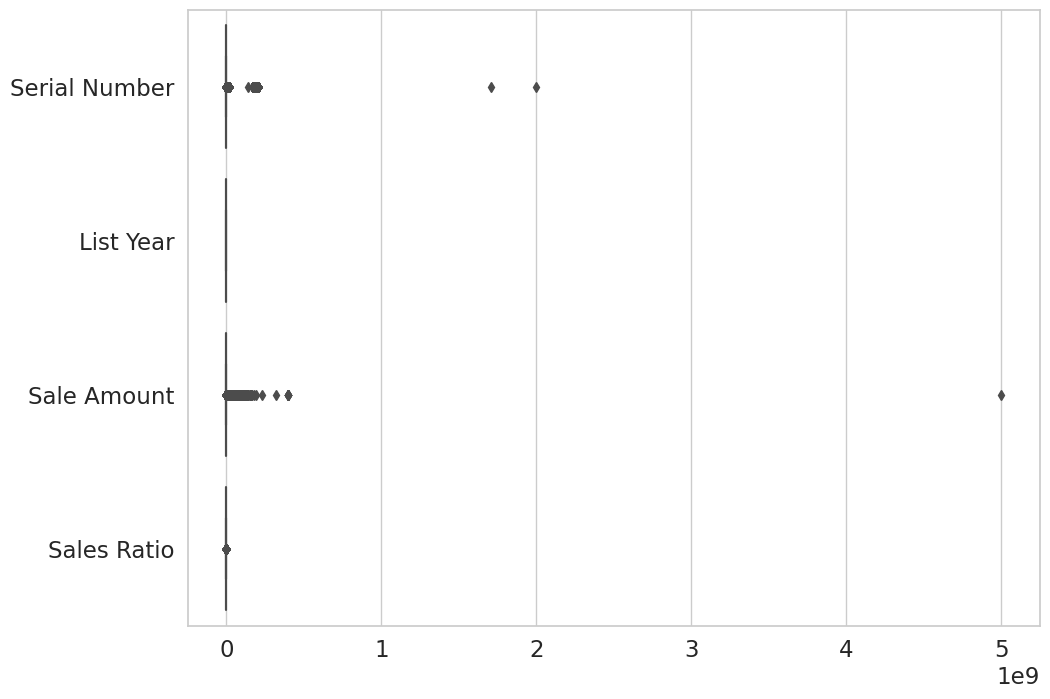

In [54]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

**Coding dibawah menggambarkan dataset menjadi x dan y**

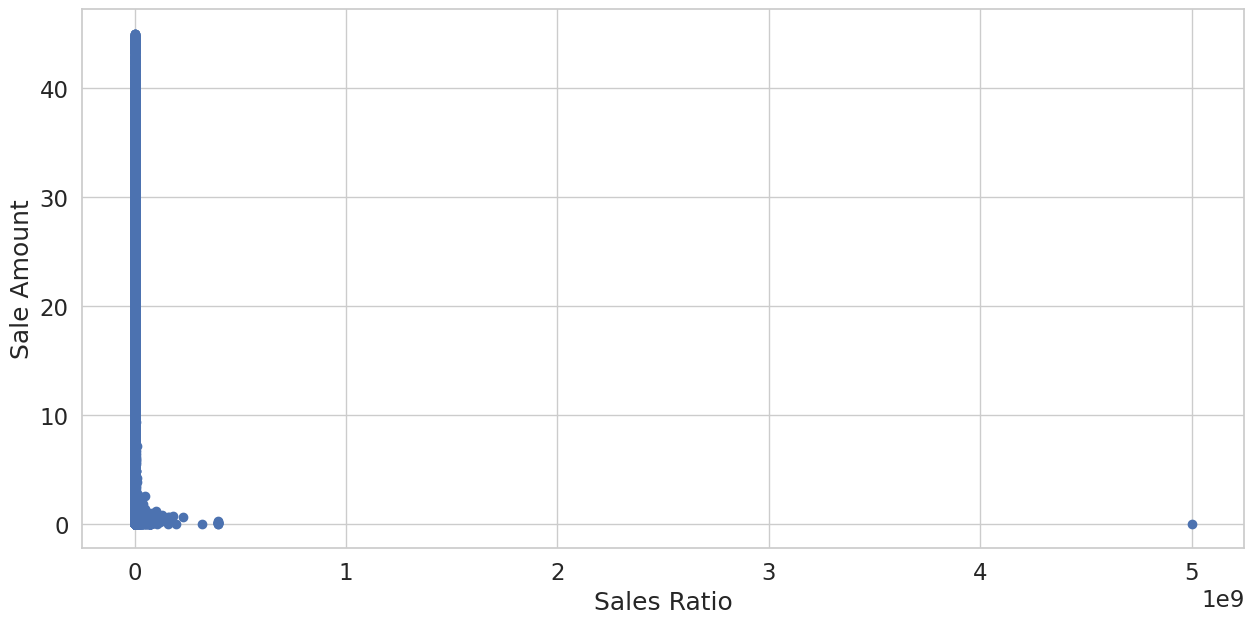

In [55]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Sale Amount'], dataset['Sales Ratio'])
 
# x-axis label
ax.set_xlabel('Sales Ratio')
 
# y-axis label
ax.set_ylabel('Sale Amount')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

**Coding dibawah dilakukan untuk mengimport library baru, lalu menggambarkan bentuk lama dari kolom dataset Sale Amount  sebelum dilakukan perubahan apapun**

In [56]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['Sale Amount'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Sale Amount'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (993266, 5)


**Coding dibawah digunakan untuk melihat bentuk baru dari kolom dataset Sale Amount setelah dilakukan berbagai banyak coding untuk menghilangkan missing value**

In [57]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Sale Amount'] > upper].index
outliers_lower = dataset[dataset['Sale Amount'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (910389, 5)


**Coding dibawah dilakukan untuk mengimport library baru, lalu menggambarkan bentuk lama dari kolom dataset Sales ratio sebelum dilakukan perubahan apapun**

In [58]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['Sales Ratio'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Sales Ratio'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (910389, 5)


**Coding dibawah digunakan untuk melihat bentuk baru dari kolom dataset Sales Ratio setelah dilakukan berbagai banyak coding untuk menghilangkan missing value**

In [59]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Sales Ratio'] > upper].index
outliers_lower = dataset[dataset['Sales Ratio'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (819151, 5)


**Coding dibawah digunakan untuk menggambarkan plot yang baru**

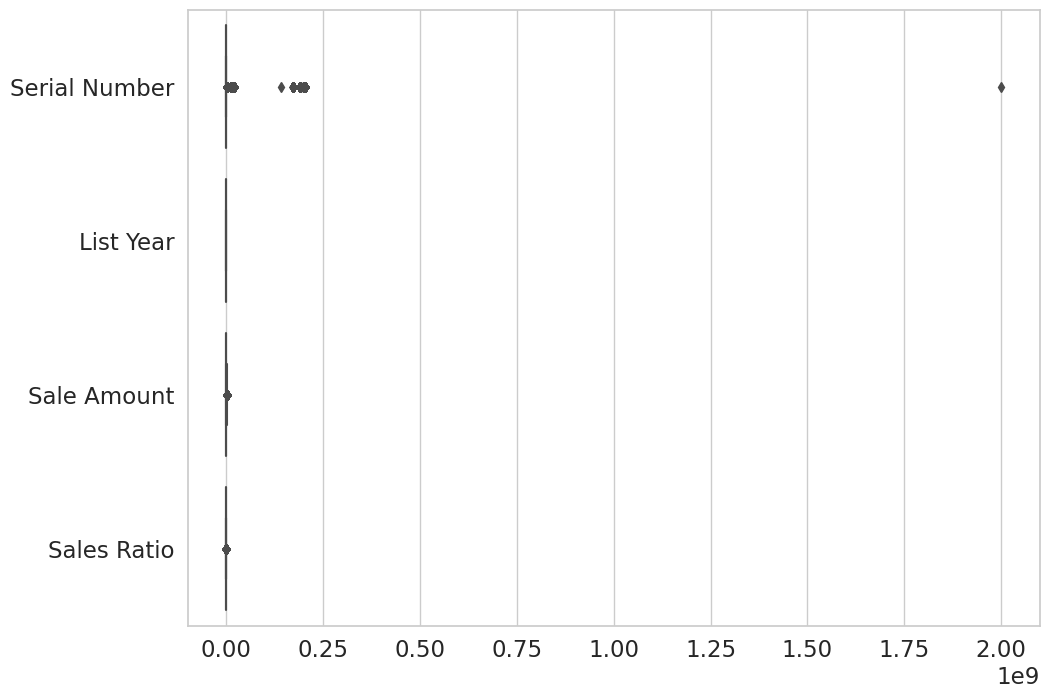

In [60]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

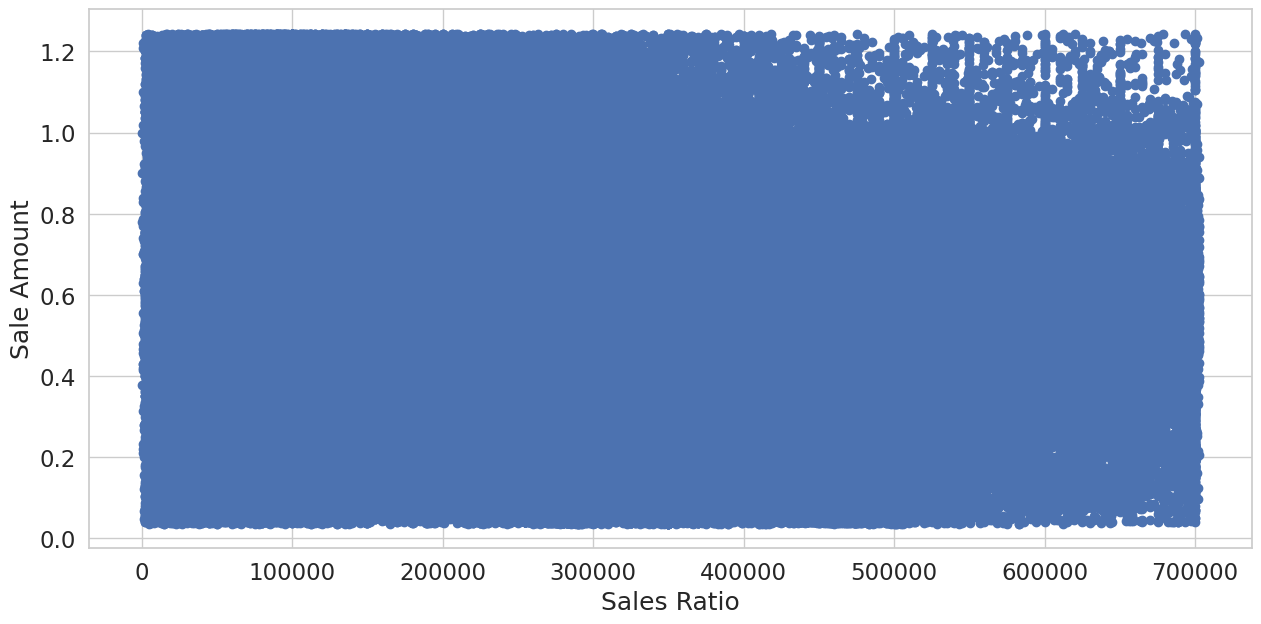

In [61]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Sale Amount'], dataset['Sales Ratio'])
 
# x-axis label
ax.set_xlabel('Sales Ratio')
 
# y-axis label
ax.set_ylabel('Sale Amount')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

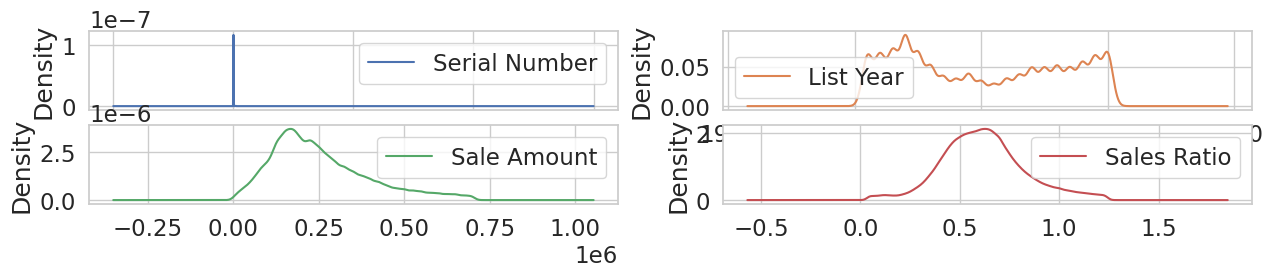

In [62]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Grafik diatas menggambarkan bahwa data pada serial number memiliki data dengan nilai yang smaa, pada grafik assessed value memiliki nilai kepadatan paling besar sekitar 5 dengan variansi tidak terlalu berbeda, Pada grafik sales ratio memiliki variansi yang berbeda-beda dan kerapatan paling tinggi bernilai 2, Pada grafik year memiliki nilai yang cukup naik turun karena data tersebut berisi jumlah berapa banyak yang terjual disetiap tahunnya terjual berapa, grafik yang terakhir menggambarkan jumlah nilai yang terjual untuk rumah yang dijual

Show data distribution based on histogram

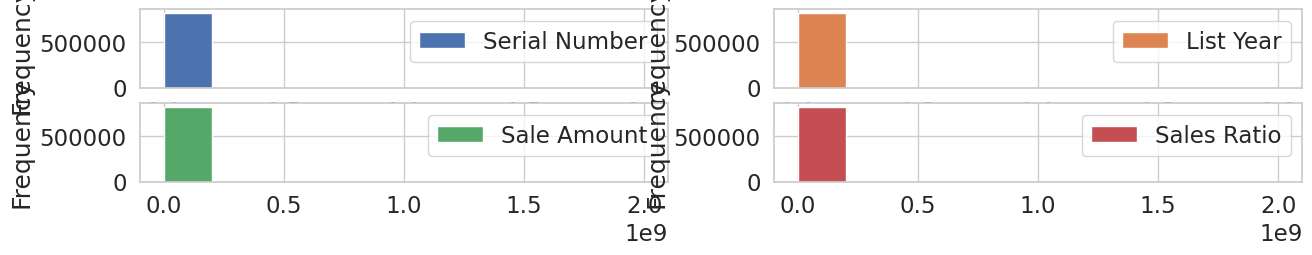

In [63]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

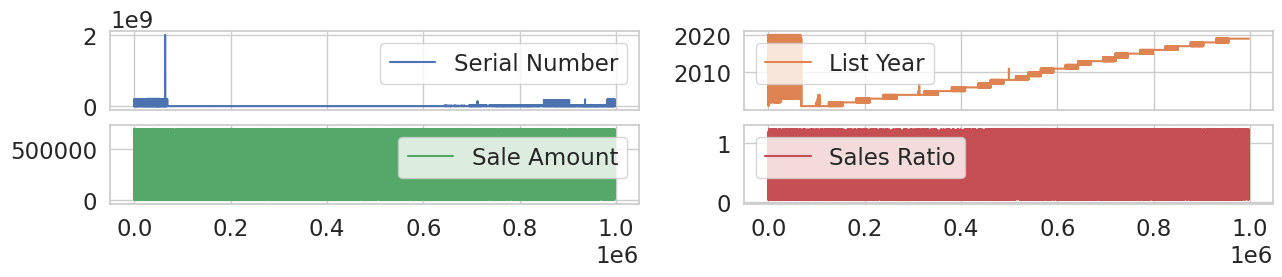

In [64]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

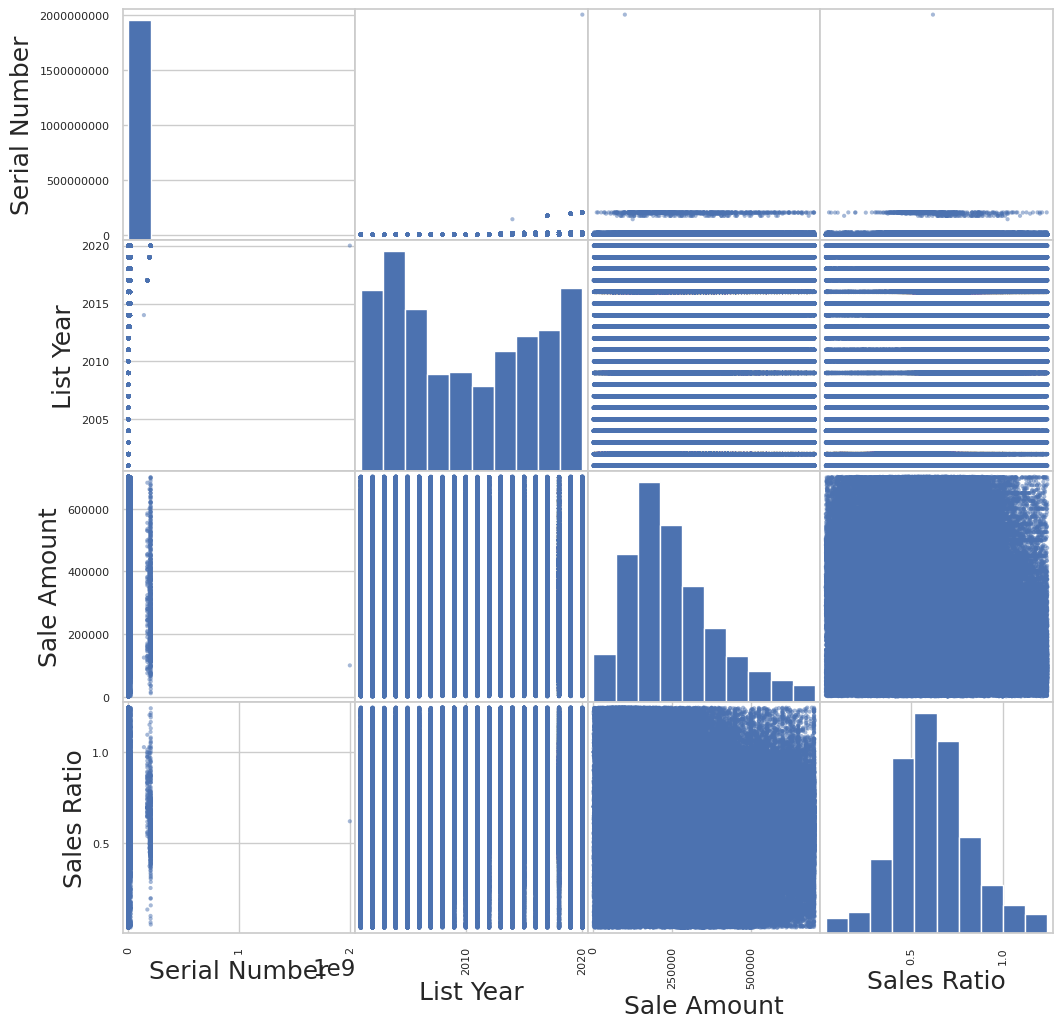

In [65]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

<ipython-input-66-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


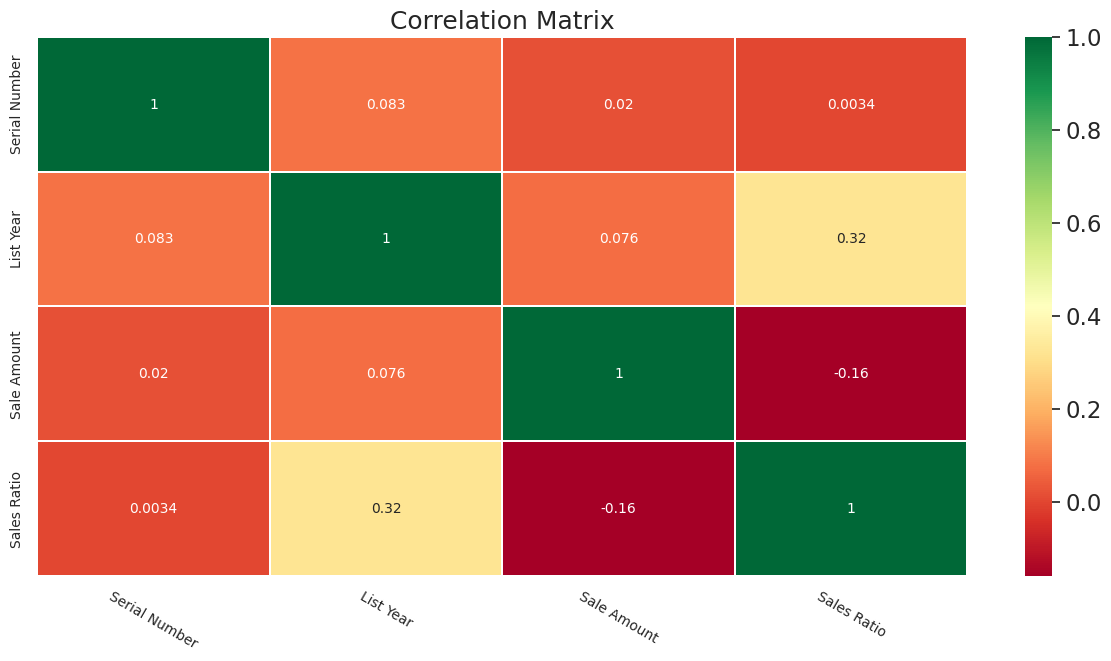

In [66]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Kode di atas digunakan untuk menghasilkan plot matriks korelasi (correlation matrix) menggunakan library seaborn (sns) dan matplotlib (plt) dalam Python. 

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

Tulis

In [80]:
x = dataset.drop('Sale Amount', axis=1)
x

,Serial Number,List Year,Town,Sales Ratio
0,2020348,2020,Ansonia,0.463000
1,20002,2020,Ashford,0.588300
2,200212,2020,Avon,0.724800
7,2020313,2020,Berlin,0.608100
9,20139,2020,Bethel,0.511500
...,...,...,...,...
997206,19921,2019,West Haven,0.509100
997208,190272,2019,New London,1.137665
997209,190284,2019,Waterbury,0.898400
997210,190129,2019,Windsor Locks,0.578300


coding diatas digunakan untuk  untuk memperoleh subset atau potongan data dari sebuah objek yang berurutan, seperti array, list, atau string, berdasarkan indeks atau range indeks tertentu.

Choose feature Type as a label

In [81]:
y = dataset["Sale Amount"]
y

0         325000.0
1         430000.0
2         179900.0
7         677500.0
9         335000.0
            ...   
997206    246000.0
997208     53100.0
997209     76000.0
997210    210000.0
997211    280000.0
Name: Sale Amount, Length: 819151, dtype: float64

coding diatas digunakan untuk  memenggil dataset dari tabel y

In [82]:
y.values.reshape(-1,1)

array([[325000.],
       [430000.],
       [179900.],
       ...,
       [ 76000.],
       [210000.],
       [280000.]])

coding diatas digunakan untuk  mengubah bentuk array satu dimensi menjadi array dua dimensi dengan satu kolom. Ini sering digunakan dalam kasus di mana kita perlu mengubah bentuk data untuk keperluan pemodelan atau analisis tertentu.

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [83]:
x = pd.get_dummies(x)
x

,Serial Number,List Year,Sales Ratio,Town_***Unknown***,Town_Andover,Town_Ansonia,Town_Ashford,Town_Avon,Town_Barkhamsted,Town_Beacon Falls,...,Town_Willington,Town_Wilton,Town_Winchester,Town_Windham,Town_Windsor,Town_Windsor Locks,Town_Wolcott,Town_Woodbridge,Town_Woodbury,Town_Woodstock
0,2020348,2020,0.463000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20002,2020,0.588300,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,200212,2020,0.724800,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020313,2020,0.608100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,20139,2020,0.511500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997206,19921,2019,0.509100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997208,190272,2019,1.137665,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997209,190284,2019,0.898400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997210,190129,2019,0.578300,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


coding diatas digunakan untuk mencari nilai dummy untuk tabel x

In [84]:
x.shape

(819151, 173)

coding diatas digunakan untuk mencari ukuran dari bentuk tabel t dengan jumlah baris sebanyak 770478 dengan kolom sebanyak 174

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [85]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
0,0.236951,1.567208,-0.745203,-0.001105,-0.031442,14.588410,-0.037836,-0.084497,-0.032813,-0.043835,...,-0.037249,-0.050794,-0.061143,-0.072737,-0.097629,-0.067934,-0.071324,-0.050406,-0.059482,-0.058112
1,-0.064601,1.567208,-0.148546,-0.001105,-0.031442,-0.068548,26.429740,-0.084497,-0.032813,-0.043835,...,-0.037249,-0.050794,-0.061143,-0.072737,-0.097629,-0.067934,-0.071324,-0.050406,-0.059482,-0.058112
2,-0.037434,1.567208,0.501443,-0.001105,-0.031442,-0.068548,-0.037836,11.834808,-0.032813,-0.043835,...,-0.037249,-0.050794,-0.061143,-0.072737,-0.097629,-0.067934,-0.071324,-0.050406,-0.059482,-0.058112
3,0.236946,1.567208,-0.054262,-0.001105,-0.031442,-0.068548,-0.037836,-0.084497,-0.032813,-0.043835,...,-0.037249,-0.050794,-0.061143,-0.072737,-0.097629,-0.067934,-0.071324,-0.050406,-0.059482,-0.058112
4,-0.064580,1.567208,-0.514255,-0.001105,-0.031442,-0.068548,-0.037836,-0.084497,-0.032813,-0.043835,...,-0.037249,-0.050794,-0.061143,-0.072737,-0.097629,-0.067934,-0.071324,-0.050406,-0.059482,-0.058112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819146,-0.064613,1.409257,-0.525683,-0.001105,-0.031442,-0.068548,-0.037836,-0.084497,-0.032813,-0.043835,...,-0.037249,-0.050794,-0.061143,-0.072737,-0.097629,-0.067934,-0.071324,-0.050406,-0.059482,-0.058112
819147,-0.038933,1.409257,2.467434,-0.001105,-0.031442,-0.068548,-0.037836,-0.084497,-0.032813,-0.043835,...,-0.037249,-0.050794,-0.061143,-0.072737,-0.097629,-0.067934,-0.071324,-0.050406,-0.059482,-0.058112
819148,-0.038931,1.409257,1.328096,-0.001105,-0.031442,-0.068548,-0.037836,-0.084497,-0.032813,-0.043835,...,-0.037249,-0.050794,-0.061143,-0.072737,-0.097629,-0.067934,-0.071324,-0.050406,-0.059482,-0.058112
819149,-0.038954,1.409257,-0.196165,-0.001105,-0.031442,-0.068548,-0.037836,-0.084497,-0.032813,-0.043835,...,-0.037249,-0.050794,-0.061143,-0.072737,-0.097629,14.720245,-0.071324,-0.050406,-0.059482,-0.058112


Coding di atas digunakan untuk melakukan transformasi data dari numerik menjadi skala yang memiliki mean (rata-rata) nol dan standar deviasi (deviation) satu.

**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [86]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
0,0.001010,1.000000,0.353603,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000010,1.000000,0.457341,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000100,1.000000,0.570351,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001010,1.000000,0.473734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000010,1.000000,0.393757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819146,0.000010,0.947368,0.391770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819147,0.000095,0.947368,0.912169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819148,0.000095,0.947368,0.714078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819149,0.000095,0.947368,0.449062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


coding diatas digunakan untuk melakukan normalisasi dari data yang ada pada dataset

**4.3 Splitting**

In [87]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x,y = make_blobs(n_samples=1000)
xTrain, xTest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1, stratify=y)

In [90]:
from collections import Counter
print("Train distribution", Counter(ytrain))
print("Test distribution", Counter(ytest))

Train distribution Counter({0: 224, 1: 223, 2: 223})
Test distribution Counter({0: 110, 1: 110, 2: 110})


Coding diatas digunakan untuk membagi dataset menjadi subset yang baru, dibagi menjadi dua subset yaitu Train distributor dan test distribution.

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [91]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [93]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, ytrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.988060 (0.013012)


Coding diatas mencari nilai dari regresi logistik yang ada pada dataset diatas

In [95]:
LR = LogisticRegression()
LR.fit(xTrain, ytrain)

LogisticRegression()

coding diatas digunakan untuk implementasi dari nilai regresi logistik

In [96]:
predictions = LR.predict(xTest)
print(accuracy_score(ytest, predictions))

0.9878787878787879


Coding diatas menggambarkan hasil prediksi dari regresi linear dan didapatkan hasil nya 1

[[109   1   0]
 [  1 109   0]
 [  2   0 108]]


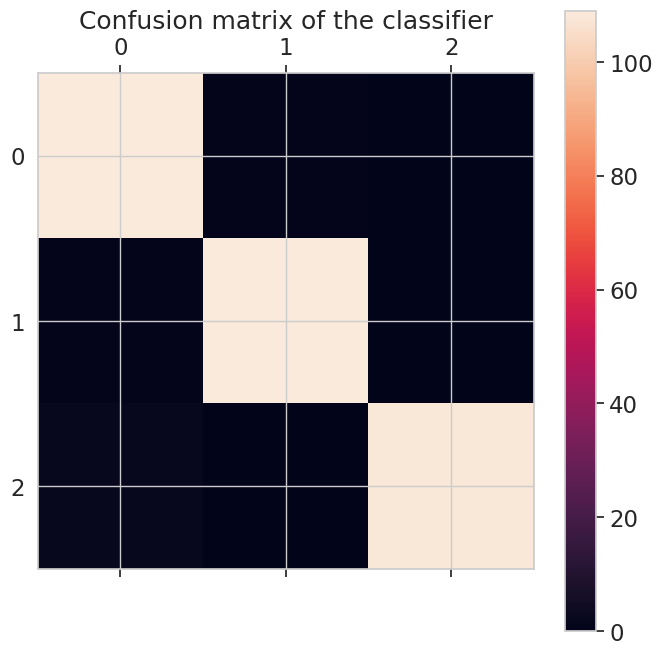

In [97]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(ytest, predictions))

cm = confusion_matrix(ytest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

Coding di atas menggambarkan hasil matriks dari dataset yang sudah diperbaiki dan dihilangkan missing valuenya

In [98]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       110
           1       0.99      0.99      0.99       110
           2       1.00      0.98      0.99       110

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



Coding diatas menggambarkan hasil laporan dari klasifikasi data yang ada